# (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

#instance label encoder
le = LabelEncoder()

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('prosperLoanData.csv')

#clean df
# df.dropna(axis=0, how='any', inplace=True)
# !!!!!!!!!!!!!!!!!!!!!!!!! i dont think col 6 has the right command
df_clean = df.dropna(how='all', axis=0)

#drop useless columns
df_clean.drop('ListingNumber', axis='columns')


,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
datatype = df_clean.dtypes==object
columns = df_clean.columns[datatype].tolist()
df_clean[columns]=df_clean[columns].apply(lambda val : le.fit_transform(val))

In [5]:
#filter columns that match high correlation
#limit correlation result

# The scope of these changes made to
# pandas settings are local to with statement.
pd.set_option('max_rows', None)


corr_result = df_clean.corr()

corr_result = corr_result.stack()

corr_result = corr_result[(corr_result != 1.0)&(corr_result > 0.7)]

display(corr_result)

ListingNumber                 ListingCreationDate             0.993884
                              ClosedDate                      0.827504
                              DateCreditPulled                0.993283
                              LoanNumber                      0.995095
                              LoanOriginationDate             0.949968
ListingCreationDate           ListingNumber                   0.993884
                              ClosedDate                      0.828444
                              DateCreditPulled                0.999470
                              LoanNumber                      0.998489
                              LoanOriginationDate             0.958953
CreditGrade                   ClosedDate                      0.805690
                              LoanOriginationDate             0.790926
ClosedDate                    ListingNumber                   0.827504
                              ListingCreationDate             0.828444
      

['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Deb

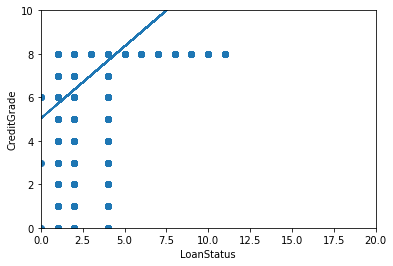

In [53]:
#trying linear regression 
print(df_clean.columns.tolist())


x = df_clean["LoanStatus"]
y = df_clean ["CreditGrade"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=0, ymax=10)
plt.xlim(xmin=0, xmax=20)
plt.xlabel("LoanStatus")
plt.ylabel ("CreditGrade")
plt.show()



## linnreg oriented from corr in assuming they have relationship with lender prosper rating
ProsperRating (Alpha)   -->   EstimatedEffectiveYield         0.824918
                              EstimatedLoss                   0.937151
                              LoanMonthsSinceOrigination
<details><summary> <u>using this formula</u> </summary>                           

x = df_clean["LoanStatus"]
y = df_clean ["CreditGrade"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin=0, ymax=10)
plt.xlim(xmin=0, xmax=20)
plt.xlabel("LoanStatus")
plt.ylabel ("CreditGrade")
plt.show()   </details>                           

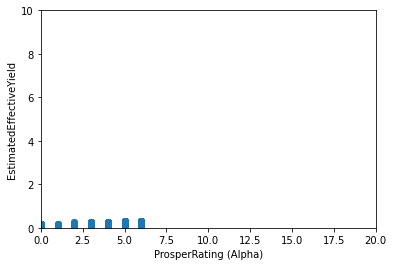

In [81]:
x = df_clean["ProsperRating (Alpha)"] 
y = df_clean["EstimatedEffectiveYield"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x): 
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y) 
plt.plot(x, slope * x + intercept) 
plt.ylim(ymin=0, ymax=10) 
plt.xlim(xmin=0, xmax=20) 
plt.xlabel("ProsperRating (Alpha)") 
plt.ylabel ("EstimatedEffectiveYield") 
plt.show()

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [ ]:
#linreg
#clean data




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

